In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Dados dos vinhos
teor_alcoolico = [3, 4, 5, 6]
acidez = ['muito', 'pouco', 'médio', 'baixo']
ph = [4.3, 2.8, 4.2, 3.9]

In [3]:
# Criação do DataFrame
df_vinhos = pd.DataFrame({
    'Teor Alcoólico': teor_alcoolico,
    'Acidez': acidez,
    'pH': ph
})


In [4]:
# Exibindo o DataFrame
df_vinhos

,Teor Alcoólico,Acidez,pH
0,3,muito,4.3
1,4,pouco,2.8
2,5,médio,4.2
3,6,baixo,3.9


In [5]:
# Codificando a coluna 'Acidez'
label_encoder = LabelEncoder()
df_vinhos['Acidez'] = label_encoder.fit_transform(df_vinhos['Acidez'])

In [6]:
# Criando a matriz numpy com os dados
matriz_dados = df_vinhos.to_numpy()

In [7]:
# Exibindo a matriz numpy
matriz_dados

array([[3. , 1. , 4.3],
       [4. , 3. , 2.8],
       [5. , 2. , 4.2],
       [6. , 0. , 3.9]])

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
# Definindo o número de clusters
num_clusters = 2  # Você pode ajustar este número conforme necessário

In [10]:
# Aplicando K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_vinhos['Cluster'] = kmeans.fit_predict(matriz_dados)

c:\Users\DSADM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Exibindo os resultados
df_vinhos[['Teor Alcoólico', 'Acidez', 'pH', 'Cluster']]

,Teor Alcoólico,Acidez,pH,Cluster
0,3,1,4.3,0
1,4,3,2.8,0
2,5,2,4.2,0
3,6,0,3.9,1


In [12]:
# Visualizando os clusters
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
# Cores para os clusters
colors = ['red' if label == 0 else 'blue' for label in df_vinhos['Cluster']]

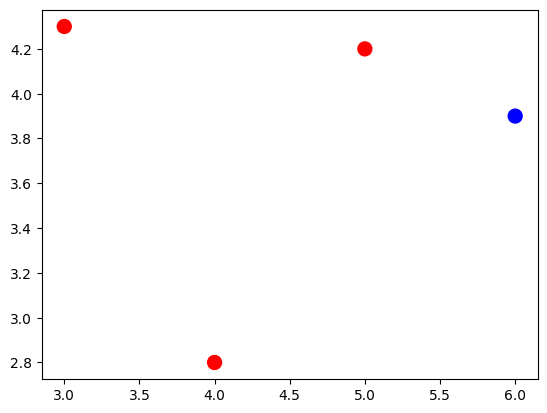

In [14]:
# Plotando os dados
plt.scatter(df_vinhos['Teor Alcoólico'], df_vinhos['pH'], c=colors, s=100)

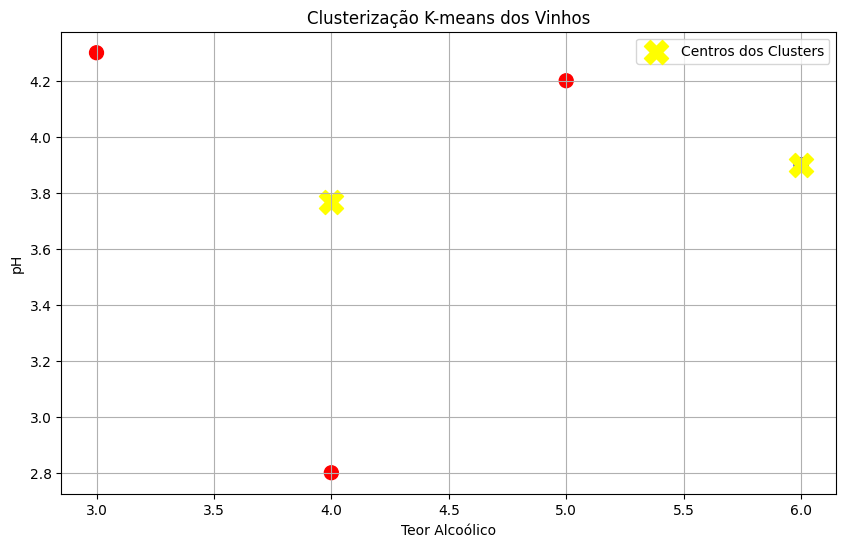

In [21]:
# Visualizando os clusters
plt.figure(figsize=(10, 6))

# Cores para os clusters
colors = ['red' if label == 0 else 'blue' for label in df_vinhos['Cluster']]

# Plotando os dados
plt.scatter(df_vinhos['Teor Alcoólico'], df_vinhos['pH'], c=colors, s=100)

# Adicionando os centros dos clusters
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 2], c='yellow', s=300, marker='X', label='Centros dos Clusters')

# Configurações do gráfico
plt.title('Clusterização K-means dos Vinhos')
plt.xlabel('Teor Alcoólico')
plt.ylabel('pH')
plt.legend()
plt.grid()
plt.show()
